# Project: Credit Card Fraud Detection

 이번 프로젝트는 신용카드로 생길 수 있는 카드 사기를 감지하는 모델을 생성하는 것입니다. 카드사에게 잘못된 카드 사용을 감지하는 것은 매우 중요합니다. 카드 사기 같은 경우는 다른 사람의 카드를 습득 또는 도난하여 카드를 사용하는 경우와 범죄자들이 조직적으로 많은 금액을 카드를 이용하여 갈취할 수 있습니다. 특히 요즘처럼 직구 구매가 증가하는 현시점에서 이런  범죄자들은 해외 사이트에서 시중 은행 체크카드의 결제의 허점을 이용하여 금액을 갈취하는 경우도 있습니다.

 카드 사기는 카드사에게 단지 금액적인 손해 뿐만 아니라 고객의 신뢰도를 떨어트리면서 서비스에 대한 심각한 문제를 야기시킬 수 있기 때문에 카드 사기를 정확하게 예측하여 예방하는 것은 매우 중요하다고 할 수 있습니다. 이 노트북은 캐글에서 제공한 데이터와 측정 방법을 토대로 작성되었습니다.[1]

## < Index >

1. Overview


2. EDA


3. Data Pre-Processing


4. Under Sampling Data


5. Over Sampling Data


6. Conculsion

## 1. Overview

 신용카드 사기를 감지하기 위해 데이터와 머신러닝 기술을 이용하여 선행된 연구들이 있었으며, 여기서는 그러한 자료를 참고하여 작성되었습니다.[2] 그중 하나는 Bertrand Lebichot 와 Yann-Ael Le Borgne에 의해서 진행된  “Deep-Learning Domain Adaptation Techniques for Credit Cards Fraud Detection”[3]  연구입니다. 이 자료에 의하면 이들은 Fraud Detection Systems (FDS)을 설계하였습니다. 이 시스템은 카드 사기 트랜잭션을 여러 복잡한 상황과 행동 패턴속에서 검출하고자 했으며, 카드 사기를 알아낼 수 있는 요인들 중에는 e-commerce 같은 온라인과 실제 오프라인 거래에 따라 다르다고 서술하고 있으며, 나라와 인구 비율에 따라서도 달라진다고 밝히고 있습니다. 

 또 다른 자료는 Olivier Caelen 와 Evgueni N. Smirnov에 의해서 작성된 "Improving Card Fraud Detection Through Suspicious Pattern Discovery” 입니다.[4] 이 연구는 의심스러운 지불 패턴을 적용하여 카드 사기를 검출하고자 시도 하였으며, 사기꾼 또는 범죄자들은 훔친 카드들을 특정한 상황에 사용하였으며, 이러한 패터은 실제 다른 상황에서도 흡사하게 다시 발생한다고 가설을 세웠습니다. 이러한 사용 패턴을 알아내고자 그들은 연구를 진행하였습니다. 
 
 캐글에서 제공하는 데이터와 예측 방법은 카드 사기의 거래를 감지하는 이진 분류로서 종속변수는 Class이며 0은 정상거래, 1은 비정상 거래로 판별하게 됩니다. 측정은 Area Under the Precision-Recall Curve (AUPRC)이며, 혼동행렬은 캐글에서 제공한 데이터처럼 데이터가 상당히 불균형한 경우에는 적합하지 않다고 설명합니다. 
 
 AUPRC 그래프는 주로 데이터의 Label 분포가 지금의 데이터처럼 심하게 불균등 할 때 AUROC 방법 보다 분석에 더 유리합니다. 그래프의 bace line을 기준으로 높으면 적정한 모델이라 평가하는 이 방법은 AUROC 처럼 면적값을 이용하여 정확도를 평가하게 됩니다.

### 1-1. 분석에 대한 문제점

    캐글에서 제공하고 있는 데이터는 2013년 9월 유럽 지역에서의 이틀 동안의 거래내역입니다. 총 283,807개의 거래 내용이 있으며 독립변수는 총 31개 입니다. 독립변수는 신용정보의 보안을 이유로 상세 내역은 알 수 없으며, V1 ~ V28번으로 구별되어 있습니다. 종속변수인 Label은 사기거래의 비율이 0.172%으로 정상거래와 심하게 차이가 나있습니다. 
    
    이처럼 불균형한 데이터는 단순하게 우세한 한 쪽의 라벨을 선택하는 경향이 커지므로 모델의 정확도와 성능이 떨어지는 문제점이 있습니다. 즉, 정확도가 높더라도 데이터의 갯수가 적은 클래스의 Recall-rate(Positive 데이터 수에서 Positive로 분류된 수) 이 급격히 작아지는 즉, 실제 카드 사기를 잡아낼 확률이 떨어지는 현상이 발생하게 됩니다. 

### 1-2. 접근 방법

    이처럼 각 클래스에 속한 데이터의 갯수 차이에 의해서 발생하는 문제를 이러한 극복할 수 있는 방법으로는 Sampling 방법이 이용되고 있습니다. 

* Under Sampling


* Over Sampling


* Combine Over and Under Sampling

     Under Sampling 방법은 다수의 클래스 데이터에서 일부만 사용하는 방법으로, 높은 비중을 차지 하는 클래스의 값들을 임의로 제거하여 모델을 훈련시키는 방법입니다.
    Over Sampling 방법은 소수 클래스의 데이터를 증가시켜서 데이터의 비율을 맞추어 Precision (카드 사기로로 예측한 내용 중에, 실제 카드 사기의 비율)을 향상 시켜서 모델을 훈련하는 방법입니다.

    카드 사기를 감지하는 정확성 높은 모델을 만들기 위하여, Under Sampling 과 Over Sampling 을 각각 알고리즘들을 훈련시켜 정확도를 측정할 것입니다. 각 서브 샘플링에는 일반적인 분류 알고리즘 이외에도 뉴럴 알고리즘을 적용하여 값을 관찰 할 것입니다. 최종적으로는 AUPRC 성능이 높은 분류기를 선택하여 튜닝을 통하여 성능을 향상시킬 것입니다. Feature Selection을 통하여 카드 사기를 감지할 수 있는 중요한 요인을 밝혀내면 좋겠지만, 안타깝게도 제공된 데이터에 정확한 항목을 알 수 없습니다. 하지만 만약 정확한 항목을 알고 있다면, 카드 사기를 미연에 방지하는데 요인들을 참고하여 금액적 손해와 고객의 서비스를 개선하는 데 도움이 될 것으로 예상합니다.

#### Reference:

1. https://www.kaggle.com/mlg-ulb/creditcardfraud
2.  https://doi.org/10.1051/shsconf/20196502002
3. Deep-Learning Domain Adaptation Techniques for Credit Cards Fraud Detection. In: Oneto, L., Navarin, N., Sperduti, A., Anguita, D. (eds.) Recent Advances in Big Data and Deep Learning, pp. 78–88. Springer, New York (2019)
4. Improving Card Fraud Detection Through Suspicious Pattern Discovery. In: Benferhat, S., Tabia, K., Ali, M. (eds.) Advances in Artificial Intelligence: From Theory to Practice, pp. 181–190. Springer, New York (2017)
5. https://mkjjo.github.io/python/2019/01/04/smote_duplicate.html
6. http://mysas.co.kr/SAS_tiptech/j_eminer.asp?B_NO=7233&gotopage=1&cmd=content

## 2. EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn

import warnings

df = pd.read_csv('creditcard.csv')
df.shape

(284807, 31)

In [2]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Check column length and names
colname = df.columns
print(colname,"\n")
print("Not Fraud: ", len(df[df['Class']==0]))
print("Fraud: ", len(df[df['Class']==1]))

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object') 

Not Fraud:  284315
Fraud:  492


    284,807개의 데이터와 30개의 독립변수들과 1개의 Label을 가지고 있음을 알 수 있습니다. 대부분의 변수들은 V1 ~ V28 처럼 익명처리를 했습니다. 캐글의 자료에 따르면 데이터는 이미 PCA 변환 통하여 주요 변수들을 선별하고, 스케일 과정과 숫자들로 전처리가 되었습니다. 스케일 과정이 거치지 않은 변수들은 Time, Amount 입니다.

* Time: 해당 거래시간 (초)

* Amout: 거래 금액
* Class: 0은 정상거래, 1은 사기

Text(0.5, 1.0, 'Label Distribution')

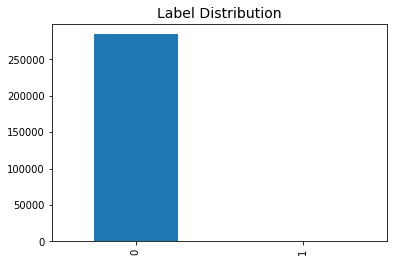

In [4]:
# Display Class count
df['Class'].value_counts().plot(kind='bar')
plt.title('Label Distribution', fontsize=14)

In [5]:
print(' fraudulent transactions ratio: {:.3f}%'.format(492 / (len(df)) * 100))

 fraudulent transactions ratio: 0.173%


### Missing Value

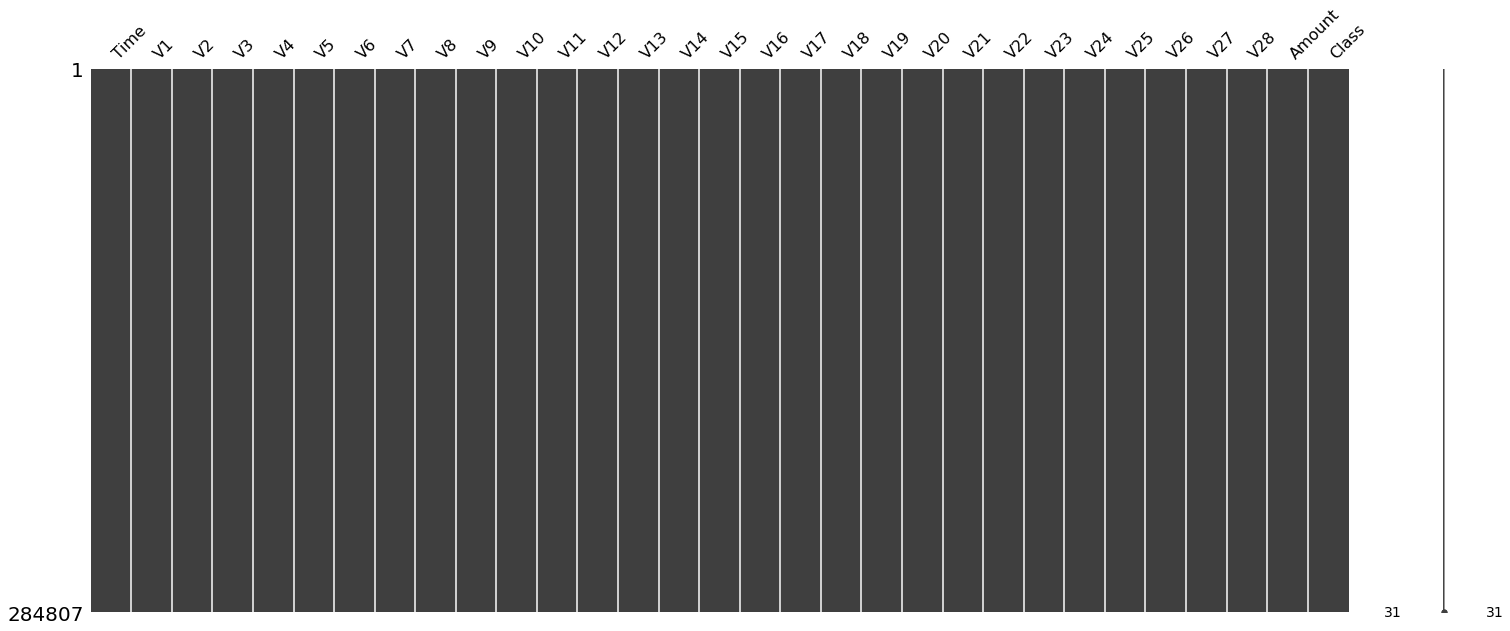

In [6]:
msn.matrix(df)

캐글에서 제공된 데이터에는 null 값이 없음을 알 수 있습니다.

### Descriptive Statistics

In [7]:
col=['Time', 'Amount', 'Class']
sample = df[col]
sample.describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


In [8]:
sample['hour'] = (sample.Time[:]/60)/60
sample.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Time,Amount,Class,hour
0,0.0,149.62,0,0.000000
1,0.0,2.69,0,0.000000
2,1.0,378.66,0,0.000278
3,1.0,123.50,0,0.000278
4,2.0,69.99,0,0.000556


### Feature: Time

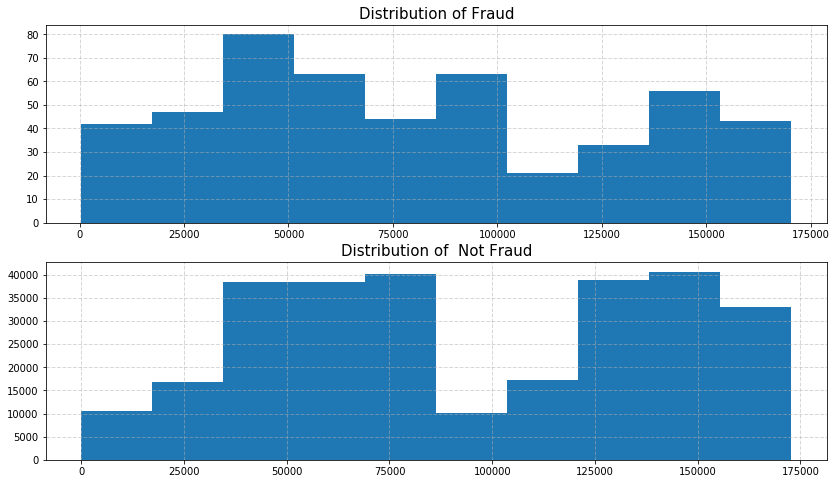

In [9]:
fit, ax = plt.subplots(2, 1, figsize=(14,8))

ax[0].hist(sample.Time[sample.Class == 1])
ax[0].set_title("Distribution of Fraud", fontsize=15)
ax[0].grid(linestyle='--', linewidth=1, alpha=0.5)

ax[1].hist(sample.Time[sample.Class == 0])
ax[1].set_title('Distribution of  Not Fraud', fontsize=15)
plt.grid(linestyle='--', linewidth=1, alpha=0.5)

plt.show()

    제공되고 있는 데이터의 시간이 초로 이루어져 있기 때문에 정확한 시작 시간을 알 수없지만 새벽 12시를 기점으로 다음 날 정시까지 이틀간 수집이 된것으로 예상이되며, 그래프에서는 초를 시간으로 변화하였습니다. 카드 사기 분포도와 정상적인 카드 트랜잭션을 비교해보면 거의 비슷하게 주로 사람들이 활동하는 시간에 동일하게 카드 사기 거래가 이루어 진것을 알 수 있습니다. 이것으로 보아 거래 시간으로 카드 사기를 구분하는 것은 어렵다고 보여집니다.

### Feature: Amount

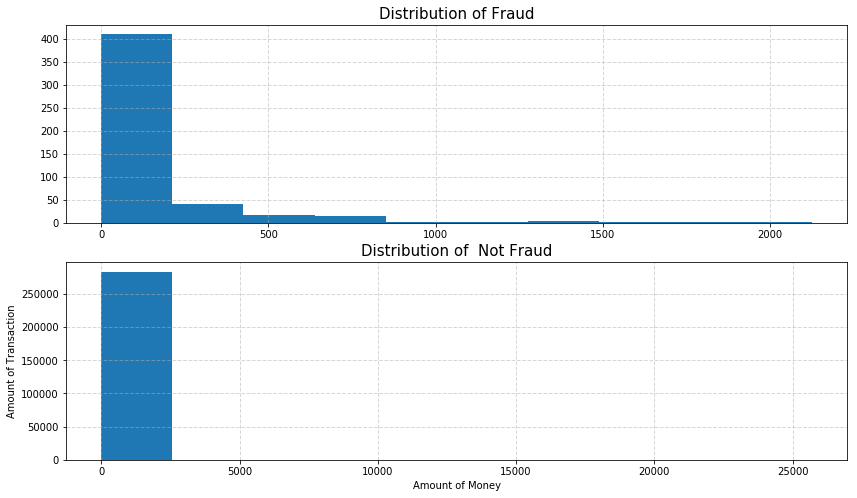

In [10]:
fit, ax = plt.subplots(2, 1, figsize=(14,8))

ax[0].hist(sample.Amount[sample.Class == 1])
ax[0].set_title("Distribution of Fraud", fontsize=15)
ax[0].grid(linestyle='--', linewidth=1, alpha=0.5)

ax[1].hist(sample.Amount[sample.Class == 0])
ax[1].set_title('Distribution of  Not Fraud', fontsize=15)
ax[1].grid(linestyle='--', linewidth=1, alpha=0.5)

plt.ylabel('Amount of Transaction')
plt.xlabel('Amount of Money')
plt.show()

    정상적인 그래프와 카드 사기로 나타난 거래를 금액별로 비교하면 카드 사기가 더 큰 것을 확인할 수 있습니다. 정상적인 거래는 평균적으로 88 달러이며, 사기로 판별난 거래의 평균은 더 높은 대략 120 달러로 나타나고 있습니다. 최고 금액은 빈도수와 금액이 거의 비슷하여 앞서 언급한 Time 변수보다는 거래를 판단하는데 유용할 수 있겠으나, 큰 금액의 빈도수가 50회 미만이여서 카드 사기에 영향을 끼치는 요인이 될지는 상관분석을 통해 더 알아보아야 합니다. 

### Correlation 

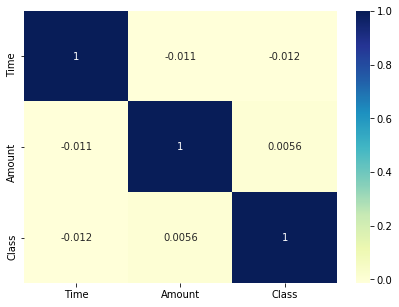

In [11]:
sample = sample.drop(columns='hour')
plt.figure(figsize=(7,5))
sns.heatmap(sample.corr(), annot=True, cmap="YlGnBu")

    불균형이 심한 원본 데이터에서 Amount 와 Time 변수를 추출하여 종속변수인 Class와의 상관관계를 살펴보면 상관계수의 값이 0에 가깝게 나와 별다른 상관관계가 없음이 나오고 있습니다. 이는 추후에 샘플링을 통한 Class 변수의 0과 1의 값을 균형을 맞춘 이후에 결과도 확인 해야할 것입니다 

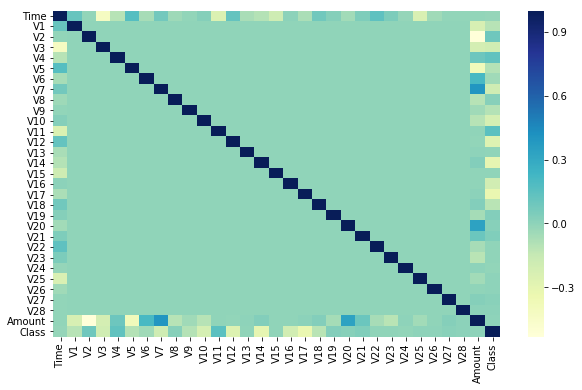

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap="YlGnBu")

불균형이 심한 원본 데이터 전체의 상관관계를 출력해 보았으나 여전히 서로의 상관관계가 거의 없음이 나타나고 있습니다.

### Outlier

Text(0.5, 1.0, 'Box-plot of Time')

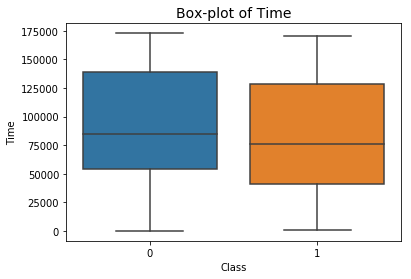

In [13]:
# Display Time boxplot
sns.boxplot(x='Class', y='Time', data=sample)
plt.title('Box-plot of Time', fontsize=14)

Text(0.5, 1.0, 'Box-plot of Amount')

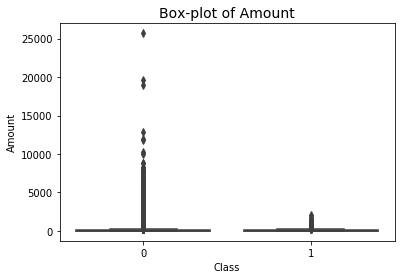

In [14]:
# Display Amount boxplot
sns.boxplot(x='Class', y='Amount', data=sample)
plt.title('Box-plot of Amount', fontsize=14)

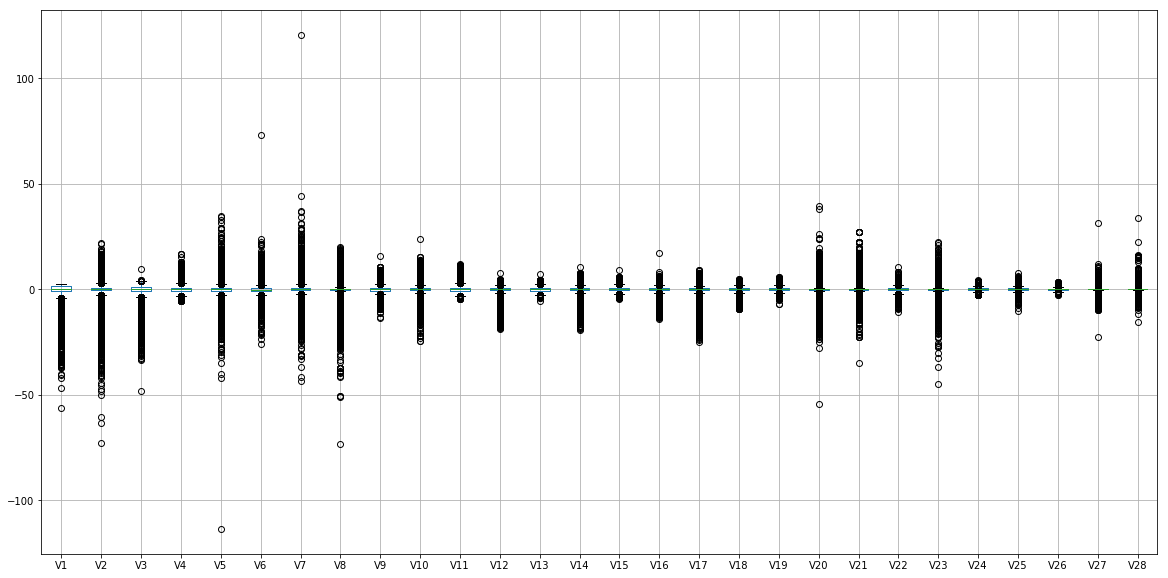

In [15]:
# Display V1~V28 features briefly 
col = [ 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10','V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']
features = df[col]
plt.figure(figsize=(20,10))
features.boxplot()

    PCA 변환 과정을 거쳐 구성된 V1~V28 변수들과 Time, Amout 변수들을 Boxplot으로 데이터들을 살펴보면 상당한 아웃라이어들이 존재한다는 것을 알 수 있습니다. 일반적으로 이러한 이상치들은 의사결정을 하는데 영향을 미칠 수 있으므로 제거해야 하지만 신용카드를 습득하거나 정보를 획득하여 금액을 인출하는 경우는 이상치들을 제거하는 것은 위험할 수 있습니다. 그러므러 이상치를 제거는 중요한 정보가 손실 될 수 있으므로, 명확한 증거가 있을 때 제거를 해야합니다. 

## 3. Data Pre-Processing

### 3-1. Scaling

    현재 데이터는 Time, Amout 변수들을 제외한 변수들은 스케일 과정을 거친 상태입니다. 전처리 과정으로 Time, Amount 변수들 또한 스케일링 작업이 수행되어야 합니다. 데이터 분석에서 스케일링은 데이터의 오버플로우나 언더플로우를 방지하고 최적화 과정에서 안정성 및 수렴 속도를 향상시킵니다. 변환을 위해서 scikit-learn에서 제공되는 RobustScaler()를 이용합니다. RobustScaler는 중앙값이 0 이고, IQR이 1이 되도록 변환하며 이상치에 더 견고한 스케일링 작업을 수행합니다.

In [16]:
from sklearn.preprocessing import RobustScaler

# Transform Time and Amount with RobustScaler
col = ['Time', 'Amount']
transfomer = RobustScaler().fit(df[col])
df[col]=transfomer.transform(df[col])

In [17]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


### 3-2. Split Data

    알고리즘 학습을 위해 처음 데이터 세트를 훈련 세트와 테스트 세트로 분할합니다. 분할 이후의 샘플링은 훈련 세트로만 진행하게 됩니다. Under Sampling 과 Over sampling 으로 학습한 알고리즘은 최종적으로 샘플링 되지 않은 초기 테스트 세트로 모델의 성능을 평가합니다. 이로써 모델이 오버피팅에 빠지는 것을 피하게 되고 새로운 데이터에 대해서 제대로 예측하도록 합니다. 

In [18]:
from sklearn.model_selection import train_test_split

# Seperate Label 
label = df['Class']
initial_df = df.drop(columns='Class')

X_train, X_test, y_train, y_test = train_test_split(initial_df, label, test_size=0.25, random_state=0)

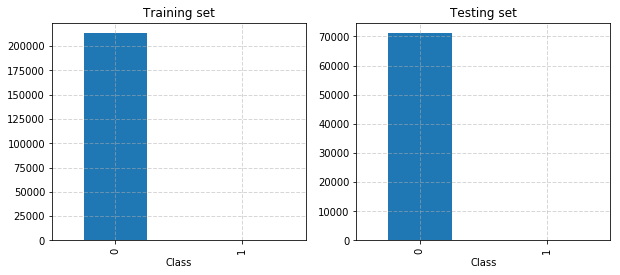

In [19]:
# Display Label distribution of Training and Testing set
fig, ax = plt.subplots(1,2, figsize=(10,4))

y_train.value_counts().plot(kind='bar', ax=ax[0])
ax[0].set_title('Training set')
ax[0].set_xlabel('Class')
ax[0].grid(linestyle='--', linewidth=1, alpha=0.5)

y_test.value_counts().plot(kind='bar', ax=ax[1])
ax[1].set_title('Testing set')
ax[1].set_xlabel('Class')
ax[1].grid(linestyle='--', linewidth=1, alpha=0.5)
plt.show()

    단순한 비율로 데이터세트를 훈련 세트와 테스트 세트로 분리하면 위의 차트처럼 Label의 분포도는 여전히 불균형합니다. 불균형한 상태에서 모델을 학습시키면 결과 또한 비중이 높은 비율의 Label에 치우치게 되는 오버피팅이 생길 수 있습니다. 이를 해결하기 위해 앞서 언급한 Sampling  방법을 사용합니다.

## 4. Under Sampling

    다수의 클래스 데이터에서 일부만 사용하는 Under Sampling 방법을 이용하여 높은 비중을 차지 하는 클래스의 값들을 임의로 제거하여 사용하도록 합니다. 아래는 샘플링을 하는 실행 순서입니다. 

1. 초기 데이터 세트에서 카드 사기의 데이터의 개수를 추출합니다.


2. 초기 데이터 세트에서 정상 거래인 데이터의 index를 추출합니다.


3. 정상 거래의 index를 카드 사기의 데이터 수만큼 무작위로 선택합니다. 


4. 초기 데이터 세트에서  카드 사기의 index를 추출합니다.


5. 추출한 카드 사기의 데이터와 선택된(3) 정상 거래의 데이터를 합치게 됩니다.

### 4-1. Prepare Under_sample data

In [20]:
# Find number of samples which are fraud
fraudNum = len(df[df['Class']==1])

# Get indice of not fraud samples
normal_index = df.loc[df['Class']==0].index

# Random Sample not fraud samples
normal_index = np.random.choice(normal_index, fraudNum, replace=False)

# Find the indices with samples
fraud_index = df.loc[df['Class']==1].index

# Concat fraud indices with sample non-fraud ones
under_df = pd.concat([df.loc[normal_index], df.loc[fraud_index]])

print("Under Sample shape: ", under_df.shape)

Under Sample shape:  (984, 31)


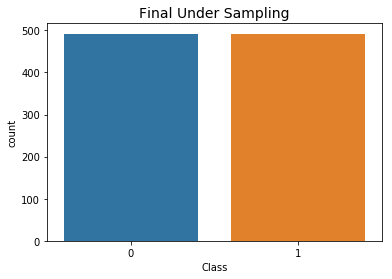

In [21]:
sns.countplot(under_df['Class'])
plt.title("Final Under Sampling", fontsize=14)
plt.show()

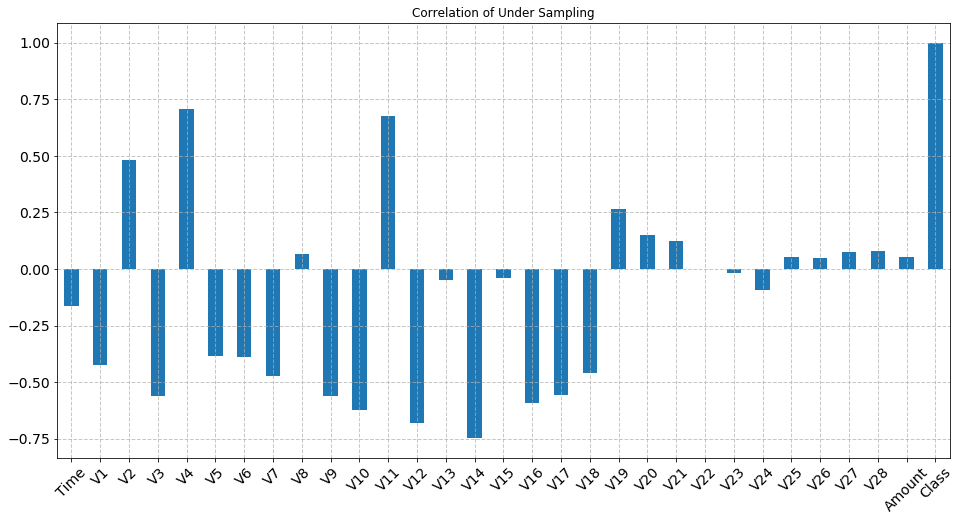

In [22]:
under_df.corrwith(under_df.Class).plot.bar(
        figsize = (16, 8), title = "Correlation of Under Sampling", fontsize = 14,
        rot = 45)
plt.grid(linestyle='--', linewidth=1, alpha=0.7)
plt.show()

    Under sampling 방법으로 Label 비율을 5:5로 맞추어 모델이 오버피팅에 빠지는 것을 방지하고 잘못된 상관관계를 가지는 것을 예방합니다. 앞서 초기 데이터 세트로 종속변수와 독립변수들 간의 상관관계를 표시했을 때에는 상관 정도가 거의 없다고 나온바가 있었으나, 샘플링 이후의 상관관계를 의미있는 결과가 도출된 것을 알 수 있습니다.
    
* V2, V4, V11 변수는 종속변수와 비교적 양의 상관관계를, V3, V10, V12, V14 변수들은 종속변수와 강한 음의 상관관계가 있습니다.

### 4-2. Split Data

     샘플링을 통한 데이터의 크기를 확연하게 줄여 모델의 학습 시간을 단축시킬 수 있을지 모르지만 최종적인 데이터의 크기는 984개로 정보 손실이 생길 수 있습니다. 훈련 데이터와 테스트 데이터의 숫자가 적은 상황에서 선택할 수 있는 방법이 k-fold cross validation 입니다. k-fold 방법은 Hold-out CV 보다 좀 더 강인한 성능 추정 방법으로 모델의 성능을 높이기 위해 resampling 하게 됩니다. 아래의 코드는 k-fold 방식으로 데이터를 학습 데이터와 테스트 데이터로 분할을 합니다.

In [23]:
# Seperate Features and Label from under-sampling data
underLabel = under_df['Class']
underSample = under_df.drop(columns='Class')

In [24]:
# Using k-fold for Cross validation
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, random_state=10, shuffle=False)
for cv_train, cv_test in cv.split(underSample, underLabel):
    X_under_train, X_under_test, y_under_train, y_under_test = underSample.iloc[cv_train], underSample.iloc[cv_test], underLabel.iloc[cv_train], underLabel.iloc[cv_test]

### 4-3. Spot check Algorithms

    Scikit-learn에서 제공하는 cross_val_score를 이용하여 학습하고자 하는 모델의 성능을 추정합니다. 교차검증의 목적은 모델의 새로운 데이터 세트에 대한 반응과 성능을 알기 위한 것으로 수치로서 값을 반환하게 됩니다. 앞서 k-fold를 이용한 학습데이터로 테스트 하게 되고, 이진분류에 적합한 알고리즘은 아래와 같습니다.

* Logistic regression
* K-NN
* Decision Tree
* Random Forest
* Gradient Boosting

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier



# Dictionary of models
models = {
    "Logistic" : LogisticRegression(solver='liblinear'),
    "K-NN": KNeighborsClassifier(),
    "RandomForest" : RandomForestClassifier(random_state=5),
    "GradientBoosting" : GradientBoostingClassifier(random_state=5)
}

# Fit the model and Display results of cross validation score
for name, model in models.items():
    model.fit(X_under_train, y_under_train)
    result = cross_val_score(model, X_under_train, y_under_train, cv=5)
    print("{} Score: {:.2f}".format(name, result.mean()*100))

Logistic Score: 94.12
K-NN Score: 93.79
RandomForest Score: 93.33


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


GradientBoosting Score: 86.02


In [26]:
cross_score = pd.DataFrame(
    {
        "Logistic regression" : [94.24],
        "K-NN":[92.88],
        "Random Forest":[93.0],
        "Gradient Boosting":[93.22]
    },index=['cross_val_score']
)
cross_score

,Logistic regression,K-NN,Random Forest,Gradient Boosting
cross_val_score,94.24,92.88,93.0,93.22


### 4-4. Learning Curve

In [27]:
from sklearn.model_selection import learning_curve

def plot_learning_curves(estimator, name, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(6,4))
    if ylim is not None:
        plt.ylim(*ylim)
  
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    # Logistic
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid(True)
    
    plt.title(name, fontsize=14)
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
    plt.legend(loc="best")

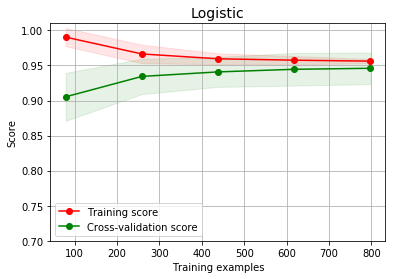

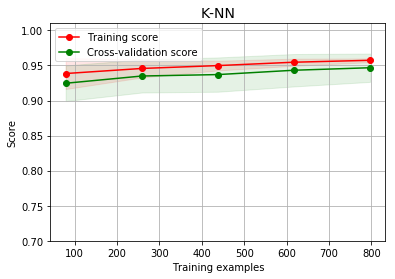

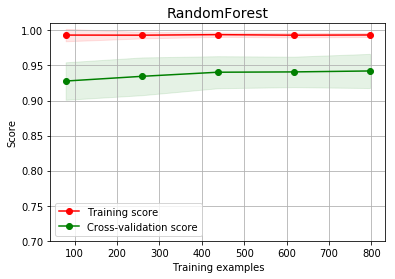

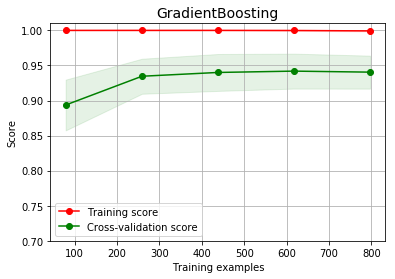

In [28]:
cv = ShuffleSplit(n_splits=100, test_size=None, random_state=0)

for name, model in models.items():
    plot_learning_curves(model, name, X_under_train, y_under_train, (0.7, 1.01), cv=cv, n_jobs=4)

    학습 데이터에 모델들의 성능을 평가하니 로지스틱 분류기와 K-NN 분류기의 성능이 높게 나온것이 확인 됩니다. 반대로 트리기반과 앙상블 모델이 비교적 낮은 점수를 기록하였습니다. 다음은 로지스틱 분류기와  K-NN 분류기의 모델 파라미터 튜닝을 시행한 이후에 다시 cross_val_score으로 성능을 평가합니다. 그리고 초기의 테스트 세트로 모델의 학습 예측력을 검증하고 최종적인 분류기를 선택합니다.

### 4-5. GridsearchCV

   Grid search는 모델이 Overfitting에 빠지지 않도록 하기위해서 Hyperparameter에 대한 최적합 작업을 수행합니다. Hyperparameter는 머신러닝 모델의 설계에 필요한 파라미터를 말합니다. 파라미터는 머신러닝 모델 동작을 결정하는 인자들로 성능에 영향을 미칩니다.  아래의 코드는 로지스틱 분류기와 K-NN 분류기의 하이퍼 파라미터를 조정하게 됩니다. 튜닝을 위한 사전 자료는 다음과 같은 페이지를 참조하였습니다.
   
   * https://www.datacamp.com/community/tutorials/parameter-optimization-machine-learning-models
   * https://stackoverflow.com/questions/21816346/fine-tuning-parameters-in-logistic-regression
   * https://m.blog.naver.com/PostView.nhn?blogId=samsjang&logNo=220968297927&proxyReferer=https%3A%2F%2Fwww.google.co.kr%2F
   * https://charleshsliao.wordpress.com/2017/05/20/logistic-regression-in-python-to-tune-parameter-c/
   * https://chrisalbon.com/machine_learning/model_selection/hyperparameter_tuning_using_grid_search/
   * https://medium.com/@erikgreenj/k-neighbors-classifier-with-gridsearchcv-basics-3c445ddeb657
  

### Logistic Classifier

In [29]:
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
from sklearn.model_selection import GridSearchCV
from time import time

# Initialize Logistic Classifier 
start=time()
logic_model = LogisticRegression(solver='liblinear')

# Create Hyperparameter
penalty = ['l1', 'l2']
max_iter=[100, 110, 120, 130, 140]
C = [1.0, 1.5, 2.0, 2.5]
param_grid = dict(penalty=penalty, max_iter=max_iter, C=C)

# Create Grid Search
clf = GridSearchCV(logic_model, param_grid=param_grid, cv=5, verbose=0)

# Conduct Grid Search
best_logic = clf.fit(X_under_train, y_under_train)
end=time()
# View Hyperparameter values and time
print("Best Score is {:.3f} using {}".format(best_logic.best_score_, best_logic.best_params_))
print("Excute Time: ", (end-start))

Best Score is 0.942 using {'C': 1.0, 'max_iter': 100, 'penalty': 'l1'}
Excute Time:  1.2631020545959473


### K-NN

In [31]:
KNeighborsClassifier()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [32]:
# Initialize Logistic Classifier 
start=time()
knn_model = KNeighborsClassifier()

# Create Hyperparameter
n_neighbors = [3,5,11,19]
weights=['uniform', 'distance']
metric=['minkowski', 'manhattan']

param_grid = dict(n_neighbors=n_neighbors, weights=weights, metric=metric)

# Create Grid Search
clf = GridSearchCV(knn_model, param_grid=param_grid, cv=5, verbose=0)

# Conduct Grid Search
best_knn = clf.fit(X_under_train, y_under_train)
end=time()
# View Hyperparameter values and time
print("Best Score is {:.3f}  using {}".format(best_knn.best_score_, best_knn.best_params_))
print("Excute Time: ", (end-start))

Best Score is 0.941  using {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
Excute Time:  0.8116648197174072


### 4-6. Best Estimator

In [33]:
# Import 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

under_clf = best_logic.best_estimator_
under_best_prediction = under_clf.predict(X_test)

precisions, recall, thresholsds = precision_recall_curve(y_test, under_best_prediction)
print("Best Under Sampling Prediction with AUPRC : {:.3f}".format(average_precision_score(y_test, under_best_prediction)))

Best Under Sampling Prediction with AUPRC : 0.078


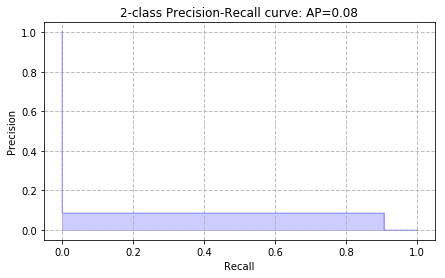

In [34]:
# Plotting average_precision_score
from inspect import signature

plt.figure(figsize=(7,4))
# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precisions, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precisions, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision_score(y_test, under_best_prediction)))
plt.grid(linestyle='--', linewidth=1, alpha=0.8)
plt.show()

Reference: https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py

재현율과 정밀도의 평균인 average_precision_score를 그래프로 나타낸 결과에 따르면 Under Sampling 데이터로 훈련한 모델의 정확도가 아주 떨어진다는 것을 알 수 있습니다.

Test Data Accuracy: 0.9835


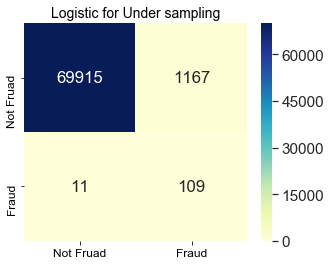

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score

metric = confusion_matrix(y_test, under_best_prediction)

# Create Data frame of metric result
metrics = pd.DataFrame(metric, index = ("Not Fraud", "Fraud"), columns = ("Not Fraud", "Fruad"))

plt.figure(figsize = (5,4))
plt.title("Logistic for Under sampling", fontsize=14)
sns.set(font_scale=1.4)
ax = sns.heatmap(metrics, annot=True, fmt='g', cmap="YlGnBu")
ax.set_xticklabels(["Not Fruad", "Fraud"], fontsize=12)
ax.set_yticklabels(["Not Fruad", "Fraud"], fontsize=12)

print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, under_best_prediction))

### 4-7. Under Sampling with Keras

샘플링된 데이터를 신경망에 학습시켜 결과를 지켜보기 위하여 다층 퍼셉트론의 Dense 계층을 이용하여 아래와 같이 구성하였습니다. 


* Dense Layer : 입력과 출력을 연결시킵니다. 이때 연결된 선들이 weight가 됩니다. weight가 높을 수록 해당 입력 뉴런에 미치는 영향이 커집니다.

* activation : 활성화 함수로 은닉층에 주로 쓰이는 relu 사용를 사용하였습니다. sigmoid는 이진 분류 문제에 쓰이는 출력층 함수입니다.


신경망 모델을 학습시키기 위한 구성은 아래와 같습니다.

* loss : weight 세트를 평가하는데 사용하는 손실함수로 이진분류 문제이므로 binary-crossentropy로 설정하였습니다.

* optimizer: 최적의 가중치를 검색하는데 사용되며 최적화 알고리즘으로 효율적인 경사 하강법 알고리즘인 adam을 사용합니다.

* metric: 평가 척도를 나타내며 accuracy를 사용합니다.

* epochs : 전체 훈련 데이터세트에 대하여 학습 반복 횟수를 지정합니다.

* batch_size: weight를 업데이트할 배치 크기를 의미합니다.

1. 첫 번째 Dense Layer: 은닉층으로 30개의 뉴런을 입력 받아 30개의 뉴런을 출력합니다.
2. 두 번째 Dense Layer: 30개의 뉴런을 입력 받아 15개의 뉴런을 출력합니다.
3. 세 번째 Dense Layer: 15개의 뉴런을 입력받아 1개의 뉴런을 출력합니다.

In [43]:
import tensorflow
from keras.models import Sequential
from keras.layers import Dense

# Create keras model
under_model = Sequential()
# Adding the input layers to keras model
under_model.add(Dense(30, input_dim=30, activation='relu'))
under_model.add(Dense(15, activation='relu'))
under_model.add(Dense(1, activation='sigmoid'))

# Compiling the model with Under sampling data
under_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# Print out model summary
print(under_model.summary())

# Training model with Under sample data
under_hist = under_model.fit(X_under_train, y_under_train, epochs=20, batch_size=25, validation_data=(X_test, y_test)).history

# Predict with initial dataset and store result over 50%
under_y_pred = under_model.predict(X_test)
under_y_pred = (under_y_pred > 0.5)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_6 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 16        
Total params: 1,411
Trainable params: 1,411
Non-trainable params: 0
_________________________________________________________________
None
Train on 886 samples, validate on 71202 samples
Epoch 1/20
886/886 [==============================] - 1s 1ms/step - loss: 0.4566 - acc: 0.8634 - val_loss: 0.4787 - val_acc: 0.9416
Epoch 2/20
886/886 [==============================] - 1s 823us/step - loss: 0.3107 - acc: 0.9391 - val_loss: 0.3239 - val_acc: 0.9839
Epoch 3/20
886/886 [==============================] - 1s 790us/step - loss: 0.2375 - 

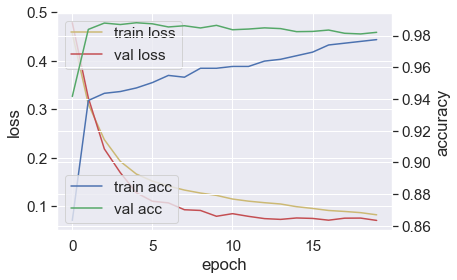

In [48]:
# Draw neural network model's accuracy and loss
def percept_acc_loss(hist):
    fig, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()
    
    loss_ax.plot(hist['loss'], 'y', label = 'train loss')
    loss_ax.plot(hist['val_loss'], 'r', label = 'val loss')

    acc_ax.plot(hist['acc'], 'b', label = 'train acc')
    acc_ax.plot(hist['val_acc'], 'g', label = 'val acc')

    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    acc_ax.set_ylabel('accuracy')

    loss_ax.legend(loc = 'upper left')
    acc_ax.legend(loc = 'lower left')

    plt.show()
    
percept_acc_loss(under_hist)

Test Data Accuracy: 0.9820


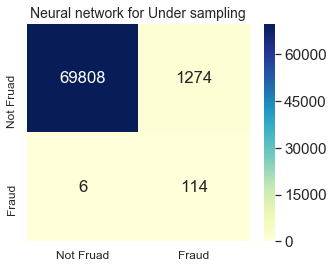

In [49]:
## Display confusion matrix for under sampling Neural network
from sklearn.metrics import confusion_matrix, accuracy_score

# rows = truth, cols = prediction
metric = confusion_matrix(y_test, under_y_pred)

# Create Data frame of metric result
metrics = pd.DataFrame(metric, index = ("Not Fraud", "Fraud"), columns = ("Not Fraud", "Fruad"))

plt.figure(figsize = (5,4))
plt.title("Neural network for Under sampling", fontsize=14)
sns.set(font_scale=1.4)
ax = sns.heatmap(metrics, annot=True, fmt='g', cmap="YlGnBu")
ax.set_xticklabels(["Not Fruad", "Fraud"], fontsize=12)
ax.set_yticklabels(["Not Fruad", "Fraud"], fontsize=12)

print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, under_y_pred))

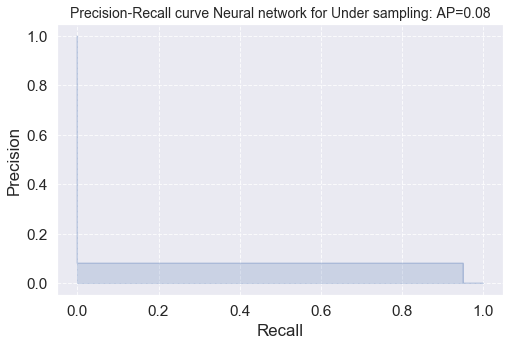

In [50]:
precisionNN, recallNN, threshodNN = precision_recall_curve(y_test, under_y_pred)

plt.figure(figsize=(8,5))
# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recallNN, precisionNN, color='b', alpha=0.2,
         where='post')
plt.fill_between(recallNN, precisionNN, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve Neural network for Under sampling: AP={0:0.2f}'.format(average_precision_score(y_test, under_y_pred)), fontsize=14)
plt.grid(linestyle='--', linewidth=1, alpha=0.8)

## 5. Over Sampling

### 5-1. Prepare Data

앞선 Under Sampling 방법의 정보손실의 우려가 있었다면, 소수 라벨의 값을 가진 클래스를 복제하여 데이터를 증가시켜서 사용하는 Over Sampling 방법은 데이터의 양이 많은 경우에 적합할 수 있습니다. 언급한것 처럼 초기의 데이터는 이틀간의 데이터이며 신용카드의 데이터는 방대하게 생성되기 때문에 이 방법이 적합하다고 할 수 있습니다. 알려진 방법들은 아래와 같습니다.


* Random Over-Sampling
* ADASYN (Adaptive Synthetic Sampling)
* SMOTE (Synthetic Minority Over-Sampling Technique)


이번에 사용할 Over Sampling 방법은 합성 데이터를 생성하는 SMOTE 입니다. 합성 소수 샘플링은 다수의 라벨을 가지고 있는 클래스를 샘플링하여 기존 희소하던 샘플을 보간후 새로운 동등한 크기의 라벨값들을 가진 클래스를 생성하는 방법입니다. SMOTE의 접근방법은 소수의 클래스들 중에서 가까운 거리를 가진 데이터들을 선택하고, 이 거리 사이에서 소수 클래스의 데이터를 생성하는 k 최근접 이웃을 찾습니다. 즉, 기존의 샘플을 주변의 이웃을 고려해 약간씩 이동시킨 점들을 추가하는 방식으로 동작합니다.

이럼으로써, 같은 샘플을 재생성하는 Random Over-Sampling 방법이 아닌 적절하게 조합하여 새로운 샘플을 만드는 SMOTE는 Under Sampling의 단점인 정보 손실의 우려를 줄이고, 더 정확한 예측을 할 수 있습니다. 하지만 단점으로는 Over-fitting의 우려가 있으며, 학습 시간이 길어질 수 있습니다. 

SMOTE의 실행 방법은 아래와 같습니다.

1. 기준이 되는 샘플을 한 개 놓고 해당 샘플과 가장 가까운 k개의 샘플을 선택
2. k개의 샘플은 모두 소수계급에서 추출. (일반적으로 5개)
3. k개의 샘플 가운데 미리 지정한 샘플링 비율에 따라 적당한 개수의 샘플을 랜덤하게 선별
4. 각각의 랜덤하게 선별된 샘플과 군집 중심의 기준샘플과의 연결 선상의 임의의 점을 선택하여 새로운 샘플을 생성

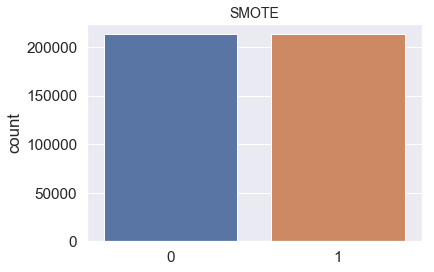

In [40]:
# Import imbalanced-learn library for SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter
# Shuffle initial data
from sklearn.utils import shuffle

X_shuffle, y_shuffle = shuffle(X_train, y_train)

# Fit initial dataset with SMOTE
smt = SMOTE()
X_over_train, y_over_train = smt.fit_sample(X_shuffle, y_shuffle)

# Display result of SMOTE 
sns.countplot(y_over_train)
plt.title("SMOTE", fontsize=14)
plt.show()

In [41]:
print("Training data after SMOTE: ",X_over_train.shape)
print("Training labe data after SMOTE: ",y_over_train.shape)

Training data after SMOTE:  (426466, 30)
Training labe data after SMOTE:  (426466,)


### 5-2. Spot check Algorithms

In [51]:
models = {
    "Logistic" : LogisticRegression(solver='liblinear'),
    "K-NN": KNeighborsClassifier(),
    "RandomForest" : RandomForestClassifier(random_state=5),
    "GradientBoosting" : GradientBoostingClassifier(random_state=5)
}

for name, model in models.items():
    model.fit(X_over_train, y_over_train)
    prediction = model.predict(X_test)
    print("{} Score: {:.2f}".format(name, average_precision_score(y_test, prediction)))

Logistic Score: 0.06
K-NN Score: 0.44


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForest Score: 0.72
GradientBoosting Score: 0.11


샘플링한 데이터에 알고리즘들을 단순하게 테스트 해보니 랜덤 포레스트의 성능이 월등하게 나왔습니다. 랜덤 포레스트는 앙상블 기법 중 수많은 Decison Tree의 집합입니다. 이는 하나로 변수 선택의 임의성과 예제 선택의 임의성 (Bagging)을 이용하여, 새로운 데이터에 취약한 Decision Tree의 성능 변동 폭이 커진다는 단점을 극복하기 위하여 고안된 방법입니다. 랜덤 포레스트는 여러개의 Decision Tree를 만들어 투표를 시켜 다수결로 결과를 결정하게 됩니다. 이로인하여 분류 정확도를 개선합니다.

### 5-3. Random Forest

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.10856853727059268


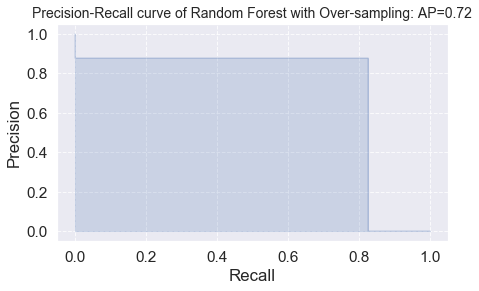

In [62]:
model = RandomForestClassifier(random_state=5)
model.fit(X_over_train, y_over_train)
over_best_prediction = model.predict(X_test)

print(average_precision_score(y_test, prediction))

precision, recall, threshod = precision_recall_curve(y_test, over_best_prediction)

plt.figure(figsize=(7,4))
# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve of Random Forest with Over-sampling: AP={0:0.2f}'.format(average_precision_score(y_test, over_best_prediction)),fontsize=14)
plt.grid(linestyle='--', linewidth=1, alpha=0.8)

Test Data Accuracy: 0.9995


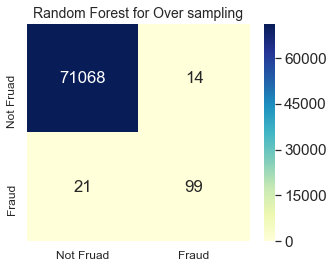

In [53]:
metric = confusion_matrix(y_test, over_best_prediction)

# Create Data frame of metric result
metrics = pd.DataFrame(metric, index = ("Not Fraud", "Fraud"), columns = ("Not Fraud", "Fruad"))

plt.figure(figsize = (5,4))
plt.title("Random Forest for Over sampling", fontsize=14)
sns.set(font_scale=1.4)
ax = sns.heatmap(metrics, annot=True, fmt='g', cmap="YlGnBu")
ax.set_xticklabels(["Not Fruad", "Fraud"], fontsize=12)
ax.set_yticklabels(["Not Fruad", "Fraud"], fontsize=12)

print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, over_best_prediction))

### 5-4. Over Sampling with Keras

적합한 신경망을 위한 히드 레이어 계층과 Parameter 튜닝을 하기 위해 몇 가지를 테스트 해보았습니다. Hyperparameter를 찾기 위해서 지금까지 사용한 Grid Search를 이용하였으며, 알맞은 히든 레이어 층을 위해서는 직접 신경망을 구성하였습니다. 명확한 히든 레이어 계층의 수란 없으며, 해결하고자 하는 문제의 특성에 따라 달라질 것입니다. 일반적으로 히든 레이어가 많아지는 깊은 신경망이 정확도가 높아질 수는 있겠으나, 이는 많은 컴퓨팅 자원과 시간이 소모되니 꼭 정답은 아닐 것입니다. 그러므로 cross validation같은 heuristic method를 이용하여 적합한 파라미터를 찾아야 할 것입니다.

 아래의 코드는 총 4개의 층을 가진 신경망을 구성한 모델입니다.
 
1. 첫 번째 Dense Layer: 입력으로 30개의 뉴런을 입력 받아 60개의 뉴런을 출력합니다.
2. 두 번째 Dense Layer: 60개의 뉴런을 입력 받아 30개의 뉴런을 출력합니다.
3. 세 번째 Dense Layer: 30개의 뉴런을 입력받아 15개의 뉴런을 출력합니다.
4. 마지막 Dense Layer: 15개의 뉴런을 입력받아 1개의 뉴런을 출력합니다.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 60)                1860      
_________________________________________________________________
dense_13 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_14 (Dense)             (None, 15)                465       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 16        
Total params: 4,171
Trainable params: 4,171
Non-trainable params: 0
_________________________________________________________________
None
Train on 426466 samples, validate on 71202 samples
Epoch 1/20
426466/426466 [==============================] - 19s 43us/step - loss: 0.0174 - acc: 0.9947 - val_loss: 0.0218 - val_acc: 0.9938
Epoch 2/20
426466/426466 [==============================] - 17s 40us/step - 

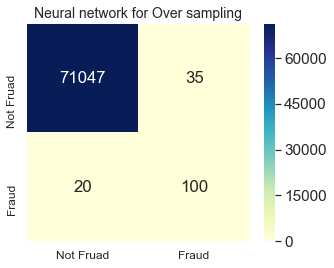

In [55]:
# Create keras model
over_model = Sequential()
# Adding the input layers to keras model
over_model.add(Dense(60, input_dim=30, activation='relu'))
over_model.add(Dense(30, activation='relu'))
over_model.add(Dense(15, activation='relu'))
over_model.add(Dense(1, activation='sigmoid'))

# Compiling the model 
over_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print out model summary
print(over_model.summary())
hist = over_model.fit(X_over_train, y_over_train, epochs=20, batch_size=25,  validation_data=(X_test, y_test)).history

# Predict with initial dataset and store result over 50%
over_y_pred = over_model.predict(X_test)
over_y_pred = (over_y_pred > 0.5)

# rows = truth, cols = prediction
metric = confusion_matrix(y_test, over_y_pred)

# Create Data frame of metric result
metrics = pd.DataFrame(metric, index = ("Not Fraud", "Fraud"), columns = ("Not Fraud", "Fruad"))

plt.figure(figsize = (5,4))
plt.title("Neural network for Over sampling", fontsize=14)
sns.set(font_scale=1.4)
ax = sns.heatmap(metrics, annot=True, fmt='g', cmap="YlGnBu")
ax.set_xticklabels(["Not Fruad", "Fraud"], fontsize=12)
ax.set_yticklabels(["Not Fruad", "Fraud"], fontsize=12)

print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, over_y_pred))

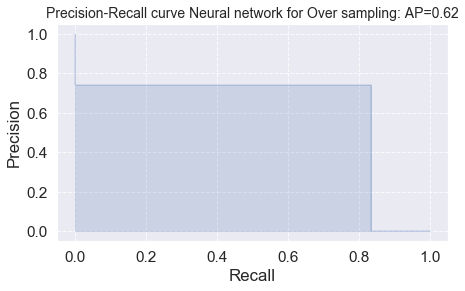

In [61]:
precisionONN, recallONN, threshodONN = precision_recall_curve(y_test, over_y_pred)

plt.figure(figsize=(7,4))
# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recallONN, precisionONN, color='b', alpha=0.2,
         where='post')
plt.fill_between(recallONN, precisionONN, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve Neural network for Over sampling: AP={0:0.2f}'.format(average_precision_score(y_test, over_y_pred)), fontsize=14)
plt.grid(linestyle='--', linewidth=1, alpha=0.8)

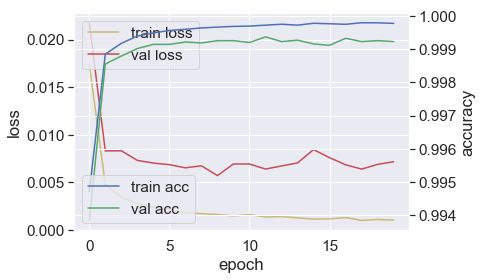

In [58]:
# Display learning curve
percept_acc_loss(hist)

* train loss: epochs 마다의 훈련 손실값으로 
* train acc: epochs 마다의 훈련 정확도 
* val loss: epochs 마다의 검증 손실값 
* val acc: epochs 마다의 검증 정확도

높은 정확도 즉 매개변수 중에서 weight가 높은 것을 찾는 것이 중요하지만, 신경망으로 학습시에는 가능한 손실함수의 값이 작은 매개변수를 찾는 것이 안정적입니다. 이유는 정확도는 매개변수의 변화에 둔감하고, 변화에 반응하더라도 불연속적으로 변화하기 때문입니다. 그와 달리 손실 함수는 매개변수의 변화에 연속적으로 변화하는 속성이 있기 때문에 미분(기울기)을 계산하고, 그 값에 따라 매개변수의 값을 업데이트하기 때문에 올바른 학습의 지표가 될 수 있습니다.

위의 차트에서 val_loss의 손실값을 확인해보면, 실제 값과 예측하고자 하는 값의 오차가 학습 반복 횟수를 증가 시켜도 train_loss와 여전히 차이가 있다는 것을 알 수 있습니다. 이는 학습 데이터에 대해서는 잘 예측하지만 새로운 데이터에 대한 신뢰도가 떨어질 수 있는 오버피팅의 위험이 있을 수도 있으나, train_loss와 val_loss의 차이가 0.01으로 크지 않다는 것을 알 수 있습니다.

# Conclusion

지금까지 초기의 데이터세트를 Under-sample 기법과 Over-sample 기법으로 나누어 각각 테스트를 해보았습니다. 아래의 그래프와 표는 Confusion Matrix와 AUPRC을 종합하여 나타내었습니다.

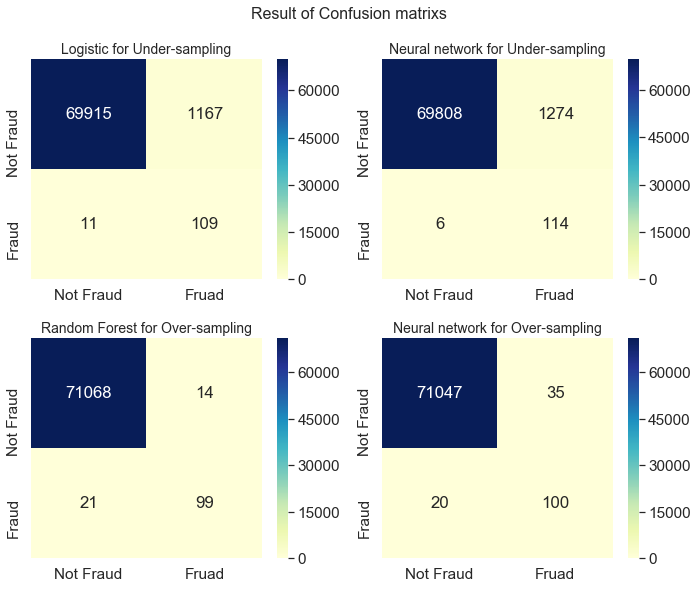

In [59]:
# Display all confusion matrix
four_metric ={
    "Logistic for Under-sampling": under_best_prediction,
    "Neural network for Under-sampling": under_y_pred,
    "Random Forest for Over-sampling":over_best_prediction,
    "Neural network for Over-sampling": over_y_pred
}

fig = plt.figure(figsize=(10,8))
i=0 
for name, model in four_metric.items():
    i+=1
    metric = confusion_matrix(y_test,model)
    # Configure mertics from recent predictions
    metrics = pd.DataFrame(metric, index = ("Not Fraud", "Fraud"), columns = ("Not Fraud", "Fruad"))
    # Subplot the confusion matrix
    ax = fig.add_subplot(2,2,i)
    ax = sns.heatmap(metrics, annot=True, fmt='g', cmap="YlGnBu")
    ax.set_title(name, fontsize=14)
    
    # Visual title
    fig.suptitle('Result of Confusion matrixs', fontsize = 16, y = 1.03)
    fig.tight_layout()

In [65]:
result = pd.DataFrame(
    [[0.08], [0.08], [0.72], [0.62]]
    , columns=['Precision-recall rate']
    ,index=['Logistic Classifier with Under sample','NN with Under sample','Random forest with Over sample','NN with Over sample']
)
result

,Precision-recall rate
Logistic Classifier with Under sample,0.08
NN with Under sample,0.08
Random forest with Over sample,0.72
NN with Over sample,0.62


Under-sample 데이터에 학습시킨 모델들의 성능이 Over-sample 데이터에 학습시킨 모델들 보다 현저히 낮은 성능을 보였습니다. 이는 학습이 제되로 되지 않은 Underfitting의 결과로 보여집니다. Confusion matrix으로 결과를 확인해보면 확연히 Over-sample 데이터의 모델이 더 정확한 예측을 하였습니다.

* Under-sample의 두 모델은 FN (정상인데 사기로 잘못 검출)의 갯수가 1000개가 넘게 잘못 예측을 하였습니다. 이는 카드사에게 고객에 대한 신뢰도를 떨어트리는 심각한 경우라고 할 수 있습니다.


* Random Forest의 모델이 신경망보다 더 낫다고 할 수 있습니다. 왜냐하면 Precison-recall rate의 점수도 더 높으며, Confusion Matrix의 결과에 따르면 FP (사기인데 사기로 제대로 검출)와 TN (사기인데 사기로 제대로 검출)의 갯수는 비슷하나 FN (정상거래인데 사기로 잘못 검출)의 양은 1/2 이상으로 줄어든 것을 알 수 있습니다. 


*  Ranom Forest의 학습 곡선을 확인해보지 않아 새로운 데이터에 대한 성능을 검증하지 못하였습니다. Over-sample 기법에 의한 데이터양의 증가로 로컬 컴퓨터에서 확인하기 힘들었으나 Amazon의 EC2 서비스를 이용하여 GPU 환경에서 확인해 볼 수 있습니다. 

지금까지 Confusion matrix와 AUPRC를 이용하여 각 모델들을 비교하였습니다. 분류를 기반으로 해결해야하는 문제는 완벽하게 분류를 하는 모델을 만드는 것이 불가능하니 처해있는 상황에 따라 적합한 모델을 선택해야 할 것입니다. 이번처럼 신용카드의 사기를 검출하는 문제에서, 만약 카드사의 입장에서라면 금적적인 손실을 막기 위해 고객의 불편을 감소하더라도 사기를 사기로 제대로 검출하는 비중을 둘지 아니면, 고객의 신뢰도를 높이는데 비중을 둘지 판단을 하고서 모델을 선택해야 할 것입니다.

여러가지 자료를 참고하여 작성하였으나 미흡한 부분이 많습니다. Over-sampling 모델의 성능을 더 높이기 위해 Grid search를 이용한 Hyperparameter tuning 처럼 성능향상을 위한 작업을 시간과 자원의 문제로 로컬 컴퓨터에서 못한 부분이 있으나, 이는 추후에 보강하도록 하겠습니다.